In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

plt.style.use('plot_style.txt')

In [17]:
OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"

In [19]:
def process_ts_results(result_dir: str,
                       num_runs: int,
                       failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [20]:
def process_original_albo_results(result_dir: str,
                                  num_runs: int,
                                  failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [74]:
original_albo_no_slack_results, original_albo_no_slack_results_mean, original_albo_no_slack_results_median, original_albo_no_slack_results_std = process_original_albo_results("../results/original_albo/lockwood/no_slack/data/", 10, 60000)
original_albo_slack_results, original_albo_slack_results_mean, original_albo_slack_results_median, original_albo_slack_results_std = process_original_albo_results("../results/original_albo/lockwood/slack_optim/data/", 12, 60000)
random_results, random_results_mean, random_results_median, random_results_std = process_ts_results("../results/20-04-23/lockwood_random/data/", 10, 6)
ts_results, ts_results_mean, ts_results_median, ts_results_std = process_ts_results("../results/21-04-23/lockwood_slack/data/", 5, 6)

(20000.0, 70000.0)

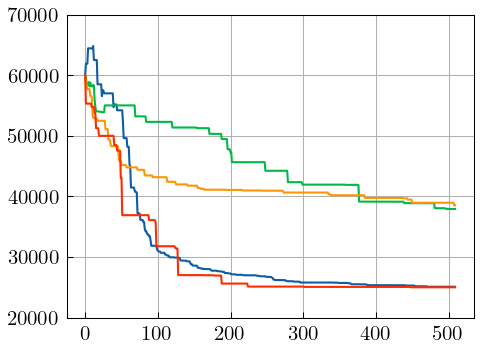

In [75]:
plt.plot(original_albo_no_slack_results_mean)
plt.plot(original_albo_slack_results_mean)
plt.plot(random_results_mean * 10000)
plt.plot(ts_results_mean * 10000)
plt.ylim(20000, 70000)

In [33]:
print(random_results[:,-1])

[4.199853 3.934676 3.792885 3.805823 3.504884 3.119033 4.120344 3.702142
 3.798054 4.543324]


In [6]:
original_albo_slack_results

array([[60000.  , 60000.  , 60000.  , ..., 31252.94, 31252.94, 31252.94],
       [60000.  , 60000.  , 60000.  , ..., 38155.92, 38155.92, 38155.92],
       [60000.  , 60000.  , 60000.  , ..., 29680.55, 29680.55, 29680.55],
       ...,
       [60000.  , 60000.  , 60000.  , ..., 29090.6 , 29090.6 , 29090.6 ],
       [60000.  , 60000.  , 60000.  , ..., 42582.38, 42582.38, 42582.38],
       [60000.  , 60000.  , 60000.  , ..., 56837.04, 56837.04, 56837.04]])

In [56]:
print(original_albo_no_slack_results[:,400])

[24900.34 25137.54 25203.81 25936.34 25382.98 25988.51 24497.17 25248.98
 25971.27 25444.11]


In [76]:
print(ts_results[:,-1])

[2.735733 2.559299 2.366506 2.3235   2.527397]


In [67]:
run = 12
with open(f"../results/14-04-23/lsq_fully_consistent/data/run_{run}_inequality_lambda_progression.pkl", "rb") as fp:
    ineq_lambd = pickle.load(fp)

In [68]:
ineq_lambd

{'INEQUALITY_CONSTRAINT_ONE': [<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([3.59996002])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.54610163])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.86882068])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.49850965])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.98658141])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.15711051])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.82955291])>,


In [8]:
import tensorflow as tf

2023-04-20 17:05:22.398238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
x = tf.Variable(0.0)
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = tf.nn.relu(x)

In [15]:
tape.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>